In [33]:
def shorten_clip(v):
    v['annotations_frame']['segment'][0] += 25
    v['annotations']['segment'][0] += 1
    v['annotations_rounded']['segment'][0] += 1
    v['duration'] -= 1
    v['duration_frame'] -= 25
    v['duration_rounded'] -=1
    return v
    

In [34]:
import json
import os

full_dictionary = {}
stats = []
labels = {'left':0, 'right':0, 'together': 0}
for f in os.listdir("../per_vid_labels"):
    with open(f'../per_vid_labels/{f}') as f:
        data = json.load(f)
        for k,v in data.items():
            full_dictionary[k] = shorten_clip(v)
            labels[v['annotations']['label']] += 1
        stats.append(len(data.items()))

            
len(full_dictionary)

14915

In [35]:
import random
valid_keys = random.sample(full_dictionary.keys(), 1000)
train_keys = [x for x in full_dictionary.keys() if x not in valid_keys]

In [36]:


def get_proportions(dataset):
    labels = {'left':0, 'right':0, 'together': 0}
    for k,v in dataset.items():
        labels[v['annotations']['label']] += 1
    print(labels)

valid_dataset = {k:full_dictionary[k] for k in valid_keys}
train_dataset = {k:full_dictionary[k] for k in train_keys}

for k,v in valid_dataset.items():
    v['subset'] = 'valid'

In [37]:
get_proportions(valid_dataset)
get_proportions(train_dataset)

{'left': 326, 'right': 355, 'together': 319}
{'left': 4568, 'right': 4804, 'together': 4543}


In [38]:
with open(f'../dataset/train.json', 'w') as outfile:
    json.dump(train_dataset, outfile)
    
with open(f'../dataset/valid.json', 'w') as outfile:
    json.dump(valid_dataset, outfile)

In [19]:
valid_dataset

{'V1rMuy-gkRk_16': {'annotations': {'label': 'left',
   'segment': [1017.64, 1021.64]},
  'annotations_frame': {'label': 'left', 'segment': [25441.0, 25541.0]},
  'annotations_rounded': {'label': 'left', 'segment': [1017.0, 1022.0]},
  'duration': 4.0,
  'duration_frame': 100.0,
  'duration_rounded': 5.0,
  'subset': 'train',
  'url': 'https://www.youtube.com/watch?v=V1rMuy-gkRk'},
 'efVoJDlQwWE_11': {'annotations': {'label': 'together',
   'segment': [1408.56, 1412.56]},
  'annotations_frame': {'label': 'together', 'segment': [35214.0, 35314.0]},
  'annotations_rounded': {'label': 'together', 'segment': [1408.0, 1413.0]},
  'duration': 4.0,
  'duration_frame': 100.0,
  'duration_rounded': 5.0,
  'subset': 'train',
  'url': 'https://www.youtube.com/watch?v=efVoJDlQwWE'},
 '5yfHuDNvS_o_3': {'annotations': {'label': 'right',
   'segment': [434.96, 438.96]},
  'annotations_frame': {'label': 'right', 'segment': [10874.0, 10974.0]},
  'annotations_rounded': {'label': 'right', 'segment': [43

(array([279., 431., 779., 298., 108.,  21.,   3.,   0.,   0.,   1.]),
 array([ 0. ,  3.5,  7. , 10.5, 14. , 17.5, 21. , 24.5, 28. , 31.5, 35. ]),
 <BarContainer object of 10 artists>)

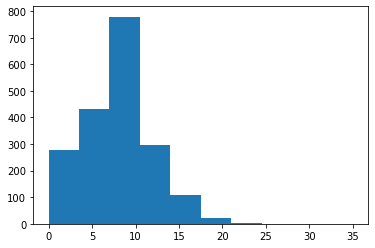

In [4]:
import matplotlib.pyplot as plt
plt.hist(stats)

In [8]:
len(os.listdir("per_vid_labels"))

991

10200.0